# Lab - Neural Language Models

## Lab Summary:
In this lab we will discuss Recurrent Neural Networks and Long Short-Term Memory (LSTM).

## Lab Goal:
Upon completion of this lab, the student should have knowledge about:
<ul>
    <li> Recurrent Neural Networks and LSTMs </li>
</ul>

## Lab Preparation:
<ul>
    <li> Review Lecture</li>
</ul>

## Packages and Classes (Initial)
In this lab we will be using the following libraries:
<ol>
    <li> NLTK </li>
    <li> Pandas </li>
    <li> Matplotlib </li>
    <li> Keras </li>
</ol>



# Neural Networks

In this lab, we design and view a simple neural network using Keras. We will train a classifier model to distinguish between 2 classes.

Keras is an open-source software library that provides a Python interface for artificial neural networks. 

We use the scikit learn library to create a dataset for ourselves. 

The dataset will have 10 columns and 2 target classes. 

In [6]:
# Import libraries.
! pip install pandas scikit-learn matplotlib nltk matplotlib keras tensorflow

from sklearn.datasets import make_classification
import pandas as pd


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
#Create the sample dataset
X, y = make_classification(n_samples = 500,
                                       n_features = 10,
                                       n_informative = 5,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.2, .3])

In [3]:
#View the dataset
print("Dataset: ");
print(pd.DataFrame(X, columns=["Feature 1", 
                               "Feature 2", 
                               "Feature 3", 
                               "Feature 4", 
                               "Feature 5",
                               "Feature 6", 
                               "Feature 7", 
                               "Feature 8", 
                               "Feature 9", 
                               "Feature 10"]).head())

Dataset: 
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   1.700375  -2.080124   2.179222  -0.793625  -0.222725  -1.322655   
1   0.973613   0.285005   0.091643   0.210645   1.783667   1.471000   
2   2.298653  -1.555773   0.673108   0.410514  -0.648620   0.516597   
3   2.244153  -3.701265   0.905820   2.018077  -0.325923  -0.819154   
4   2.597867   2.028631   1.871560  -0.457751  -0.688451  -0.594938   

   Feature 7  Feature 8  Feature 9  Feature 10  
0  -1.272728   0.155074   0.506588    1.670934  
1  -0.905175   1.142797  -0.824851   -0.973679  
2   2.653244  -2.198638   1.326468   -1.279391  
3  -0.431037  -1.506439  -0.639931    2.527993  
4  -4.394600   0.605699  -0.263265   -2.238700  


In [4]:
# Split the dataset into 80% training and 20% test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 42)

# Recurrent Neural Networks

- RNNs are a powerful and robust type of neural network with an internal memory 

- RNN’s can remember important things about the input, which allows them to predict what’s coming next 

- They are often preferred for sequential data like speech and text.

![Image](3-Recurrent-Neural-Network.webp)

Image Source: https://i1.wp.com/dataaspirant.com/wp-content/uploads/2020/11/3-Recurrent-Neural-Network.png?resize=626%2C463&ssl=1

![Image](RNNvsFFNN.png)

Image Source: https://nerdthecoder.files.wordpress.com/2019/02/731df-0mrhhgabskajpbt21.png


# Types of RNN

![Image](RNNTypes.webp)

Image Source: https://victorzhou.com/static/2a37bd4e9b12bcc19e045eaf22fea4e5/7e3cb/rnns.webp

# Task

For each of the following applications, which type of RNN should be used?

1. Sentiment Classification (Use a sentence as input and predict the sentiment as positive, negative or neutral)

2. Machine Translation (Use a sentence in one language as input and predict a translated sentence in the desired language)

# Answer Key

### Student Response Here:
1. Sentiment Classification (Use a sentence as input and predict the sentiment as positive, negative or neutral)

<b>Answer</b>: Many-to-One

2. Machine Translation (Use a sentence in one language as input and predict a translated sentence in the desired language)

<b>Answer</b>: Many-to-Many


# Sequential Model RNN - Keras

- There are two ways to build Keras models: sequential and functional. 
- The sequential API allows you to create models layer-by-layer for most problems. 

- More here: https://machinelearningmastery.com/keras-functional-api-deep-learning/

In [5]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# Some useful built in RNN layers in Keras
# Check out: https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN

# Define a sequential model:
model = keras.Sequential()

# Create an Embedding layer 
model.add(layers.Embedding(input_dim=1000, output_dim=64))
### Notes:
# input_dim defines the size of the vocabulary: the maximum number of words in the vocabulary
# output_dim defines the size (dimensions) of the output vector.

# Add LSTM layer. Use layers.LSTM() and to define number of units pass an integer.
model.add(layers.LSTM(128))

# layers.Dense(x) adds a dense layer with x units.
model.add(layers.Dense(10))


# Task

1. Define a sequential model

2. Add an embedding layer that has a max vocabulary size of 2048 words and outputs a vector of dimension 256

3. Add an LSTM layer with 192 units

4. Add a dense layer with 2 units

5. Display a summary of your model using model.summary()

In [15]:
# Your code here
seq_model = keras.Sequential()
seq_model.add(layers.InputLayer(shape=(100,)))

# Create an Embedding layer
seq_model.add(layers.Embedding(input_dim=2048, output_dim=256))

# Add LSTM layer. Use layers.LSTM() and to define number of units pass an integer.
seq_model.add(layers.LSTM(192))

# layers.Dense(x) adds a dense layer with x units.
seq_model.add(layers.Dense(2))


seq_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 256)       │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 192)            │       344,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869,506 (3.32 MB)

 Trainable params: 869,506 (3.32 MB)

 Non-trainable params: 0 (0.00 B)

# Questions:
1. What are the total number of parameters in your model? **869,506**

2. How many of those parameters are non-trainable? **0**


# Task

You are given an image of a model and its layers, below. 

1. Your task is to fill in the blanks in the code block to re-create this model.

<i>NOTE: The code is started for you. </i>



In [16]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model # <- Use this in Jupyter Lab.
# from keras.utils.vis_utils import plot_model <- this might work in Colab.
from keras import Sequential
from keras.layers import SimpleRNN, Dense, LSTM

In [ ]:
# The image of the model you need to make
from IPython.display import Image
Image(filename="kerasmodelunit7.png")

/Users/rewheaton/Code/rewheaton.github.io/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


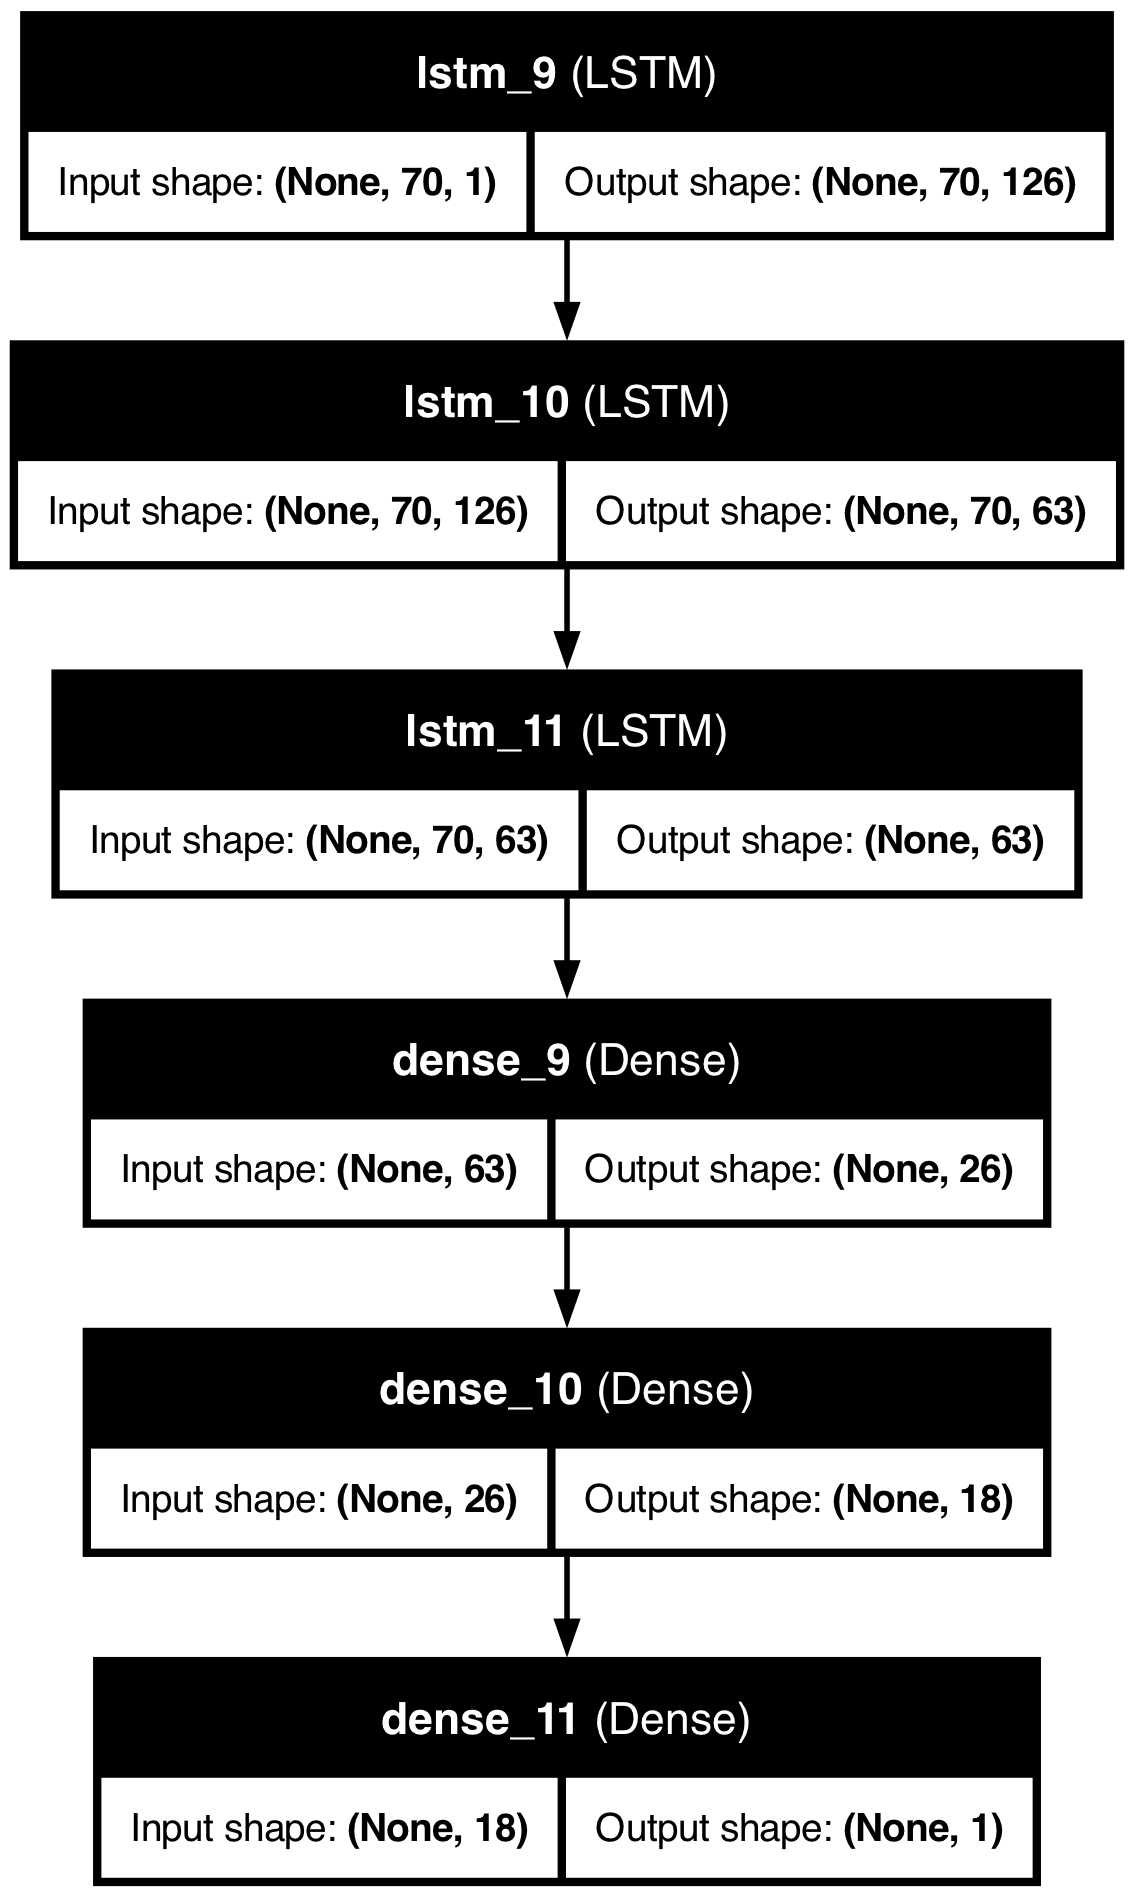

In [ ]:
# Fill in the parameters to create the model above:
model = Sequential() #initialize sequential model
model.add(layers.InputLayer(shape=(70,1)))
model.add(LSTM(126, return_sequences=True)) #LSTM layer with 126 neurons
model.add(LSTM(63, return_sequences=True)) #LSTM layer with 63 neurons
model.add(LSTM(63)) #LSTM layer with 63 neurons
model.add(Dense(26,activation='relu')) #Dense layer with 26 neurons
model.add(Dense(18,activation='relu')) #Dense layer with 18 neurons, relu activation
model.add(Dense(1,activation='relu')) #Dense output layer with 1 neuron, relu activation
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Bidirectional Model RNN

Bidirectional RNNs are collections of 2 independent RNNS.

Read the basic implementation of bidirectional RNN here and design the following network.

![Image](BiRNN.png)

Image Source: https://miro.medium.com/max/1050/1*6QnPUSv_t9BY9Fv8_aLb-Q.png

# Task

1. Design a sequential model that takes an input vector of shape (10,20)
2. Add a bidirectional LSTM layer of 25 neurons. Use return_sequences=True.
3. Add another bidirectional LSTM layer of 15 neurons
4. Add a dense layer of 10 neurons

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Bidirectional
from keras.layers import SimpleRNN, Dense, LSTM
import numpy as np

In [20]:
# Define parameters (same as used during training)
max_features = 20000
maxlen = 80
embedding_dim = 128
lstm_out = 128

In [21]:
# Load the IMDB dataset and preprocess, and get word indexing.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
word_index = imdb.get_word_index()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# your code here:
# Create sequential model
imdb_model = keras.Sequential()

# Add layers
imdb_model.add(layers.Input(shape=(maxlen,)))
imdb_model.add(layers.Embedding(input_dim=max_features, output_dim=embedding_dim))
imdb_model.add(layers.LSTM(lstm_out))
imdb_model.add(layers.Dense(1, activation='sigmoid'))

# Display model summary
imdb_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 80, 128)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,691,713 (10.27 MB)

 Trainable params: 2,691,713 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

# Testing your model

In [30]:
# Compile the model
imdb_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
imdb_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=128)

# Evaluate the model
score, acc = imdb_model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.9570 - loss: 0.1174 - val_accuracy: 0.8195 - val_loss: 0.5300
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.9732 - loss: 0.0740 - val_accuracy: 0.8193 - val_loss: 0.6211
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9812 - loss: 0.0537 - val_accuracy: 0.8083 - val_loss: 0.7746
Test score: 0.7745886445045471
Test accuracy: 0.8083199858665466
